In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [8]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)
X1234 = np.zeros([1,1,16,16])
X1234[0,0,:,:] = np.kron(X,np.kron(X,np.kron(X,X)))
X12 = np.zeros([1,1,16,16])
X12[0,0,:,:] = np.kron(X,np.kron(X,np.kron(Id,Id)))

X14= np.zeros([1,1,16,16])
X14[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,X)))

X13= np.zeros([1,1,16,16])
X13[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(X,Id)))

X1 = np.zeros([1,1,16,16])
X1[0,0,:,:] = np.kron(X,np.kron(Id,np.kron(Id,Id)))


MPO1234 = iMPS.iMPO()
MPO1234.construct_from_tensor_list([X1234,X1234])

MPO14 = iMPS.iMPO()
MPO14.construct_from_tensor_list([X14,X14])

MPO13 = iMPS.iMPO()
MPO13.construct_from_tensor_list([X13,X13])

MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])


dephasing channel

In [ ]:
eigs=[]
lam1s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0,1.01,0.01)
for p in rng:   
    
 
    
    trans = funcs.single_trans_qc(p)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-5)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    lam1s.append(lam1)
    print(p)

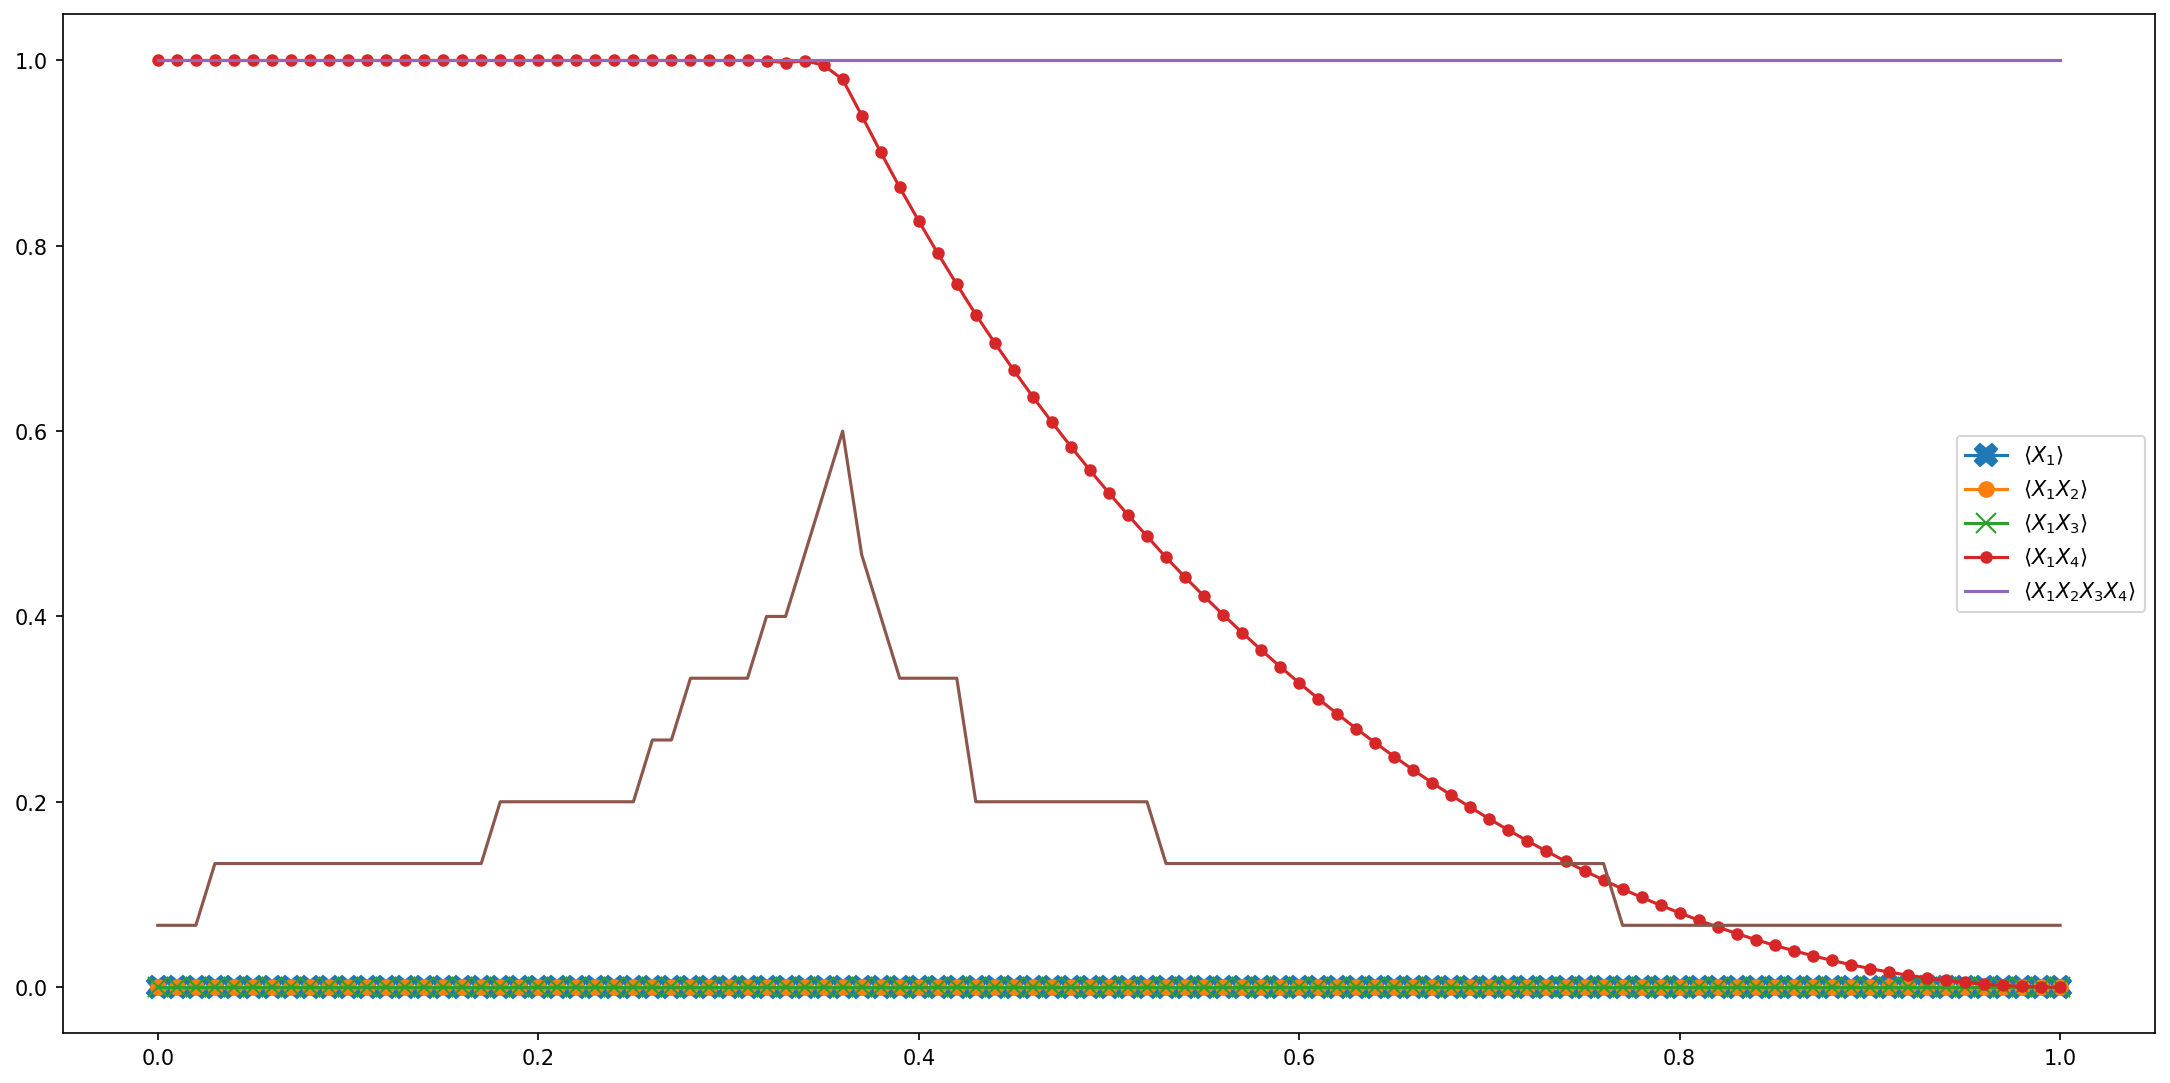

In [9]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

depolarizing channel

In [ ]:
eigs=[]
lam1s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])
rng=np.arange(0.,1.01,0.01)
for p in rng:   
    
    trans = funcs.single_trans_qc(p,'depolarizing')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-3)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    lam1s.append(lam1)
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    print(p)

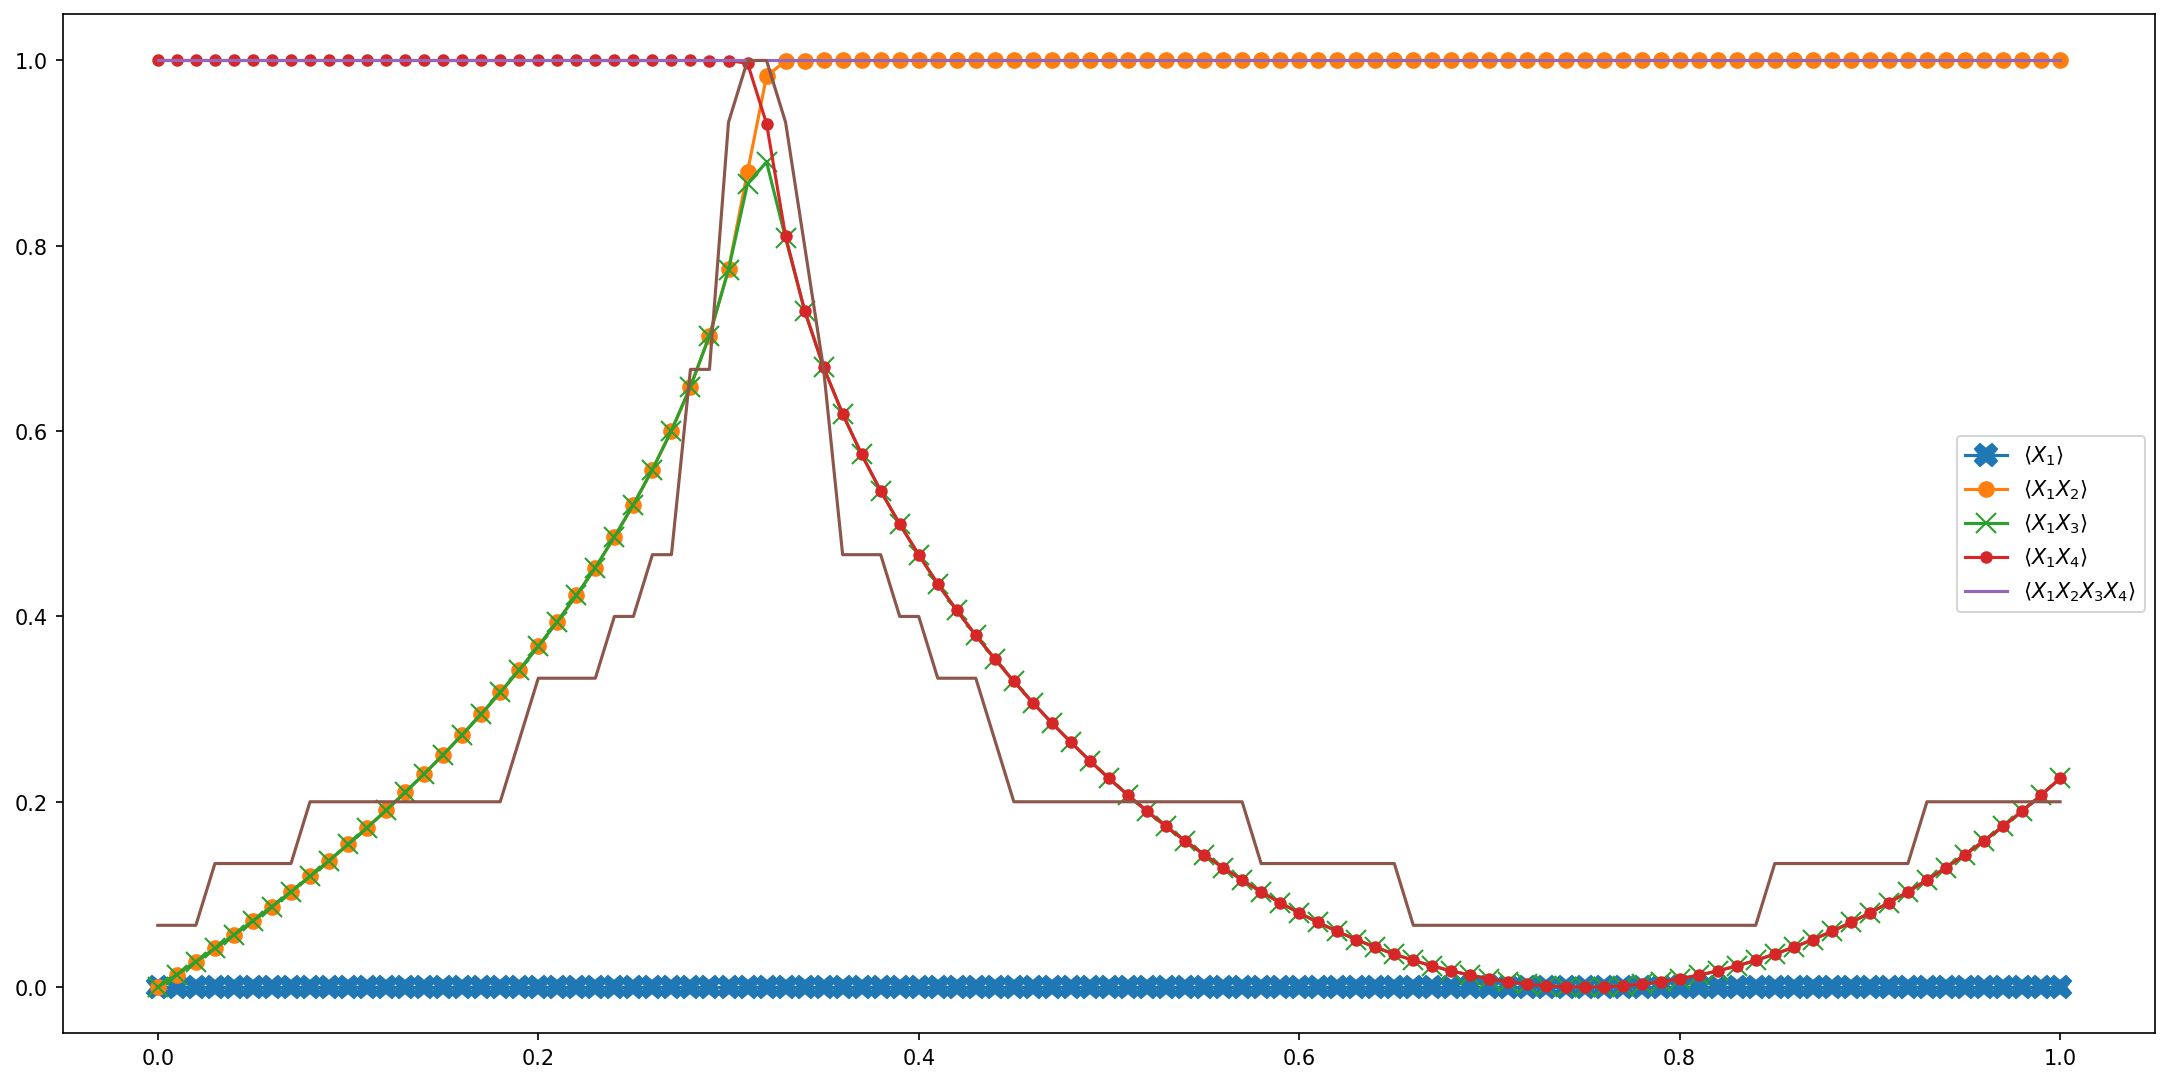

In [49]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

Amplitude damping channel

In [ ]:
eigs=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])
rng = np.arange(0.,1.001,0.01)
for p in rng:   
    
    trans = funcs.single_trans_qc(p,'deamp')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-3)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    print(p)

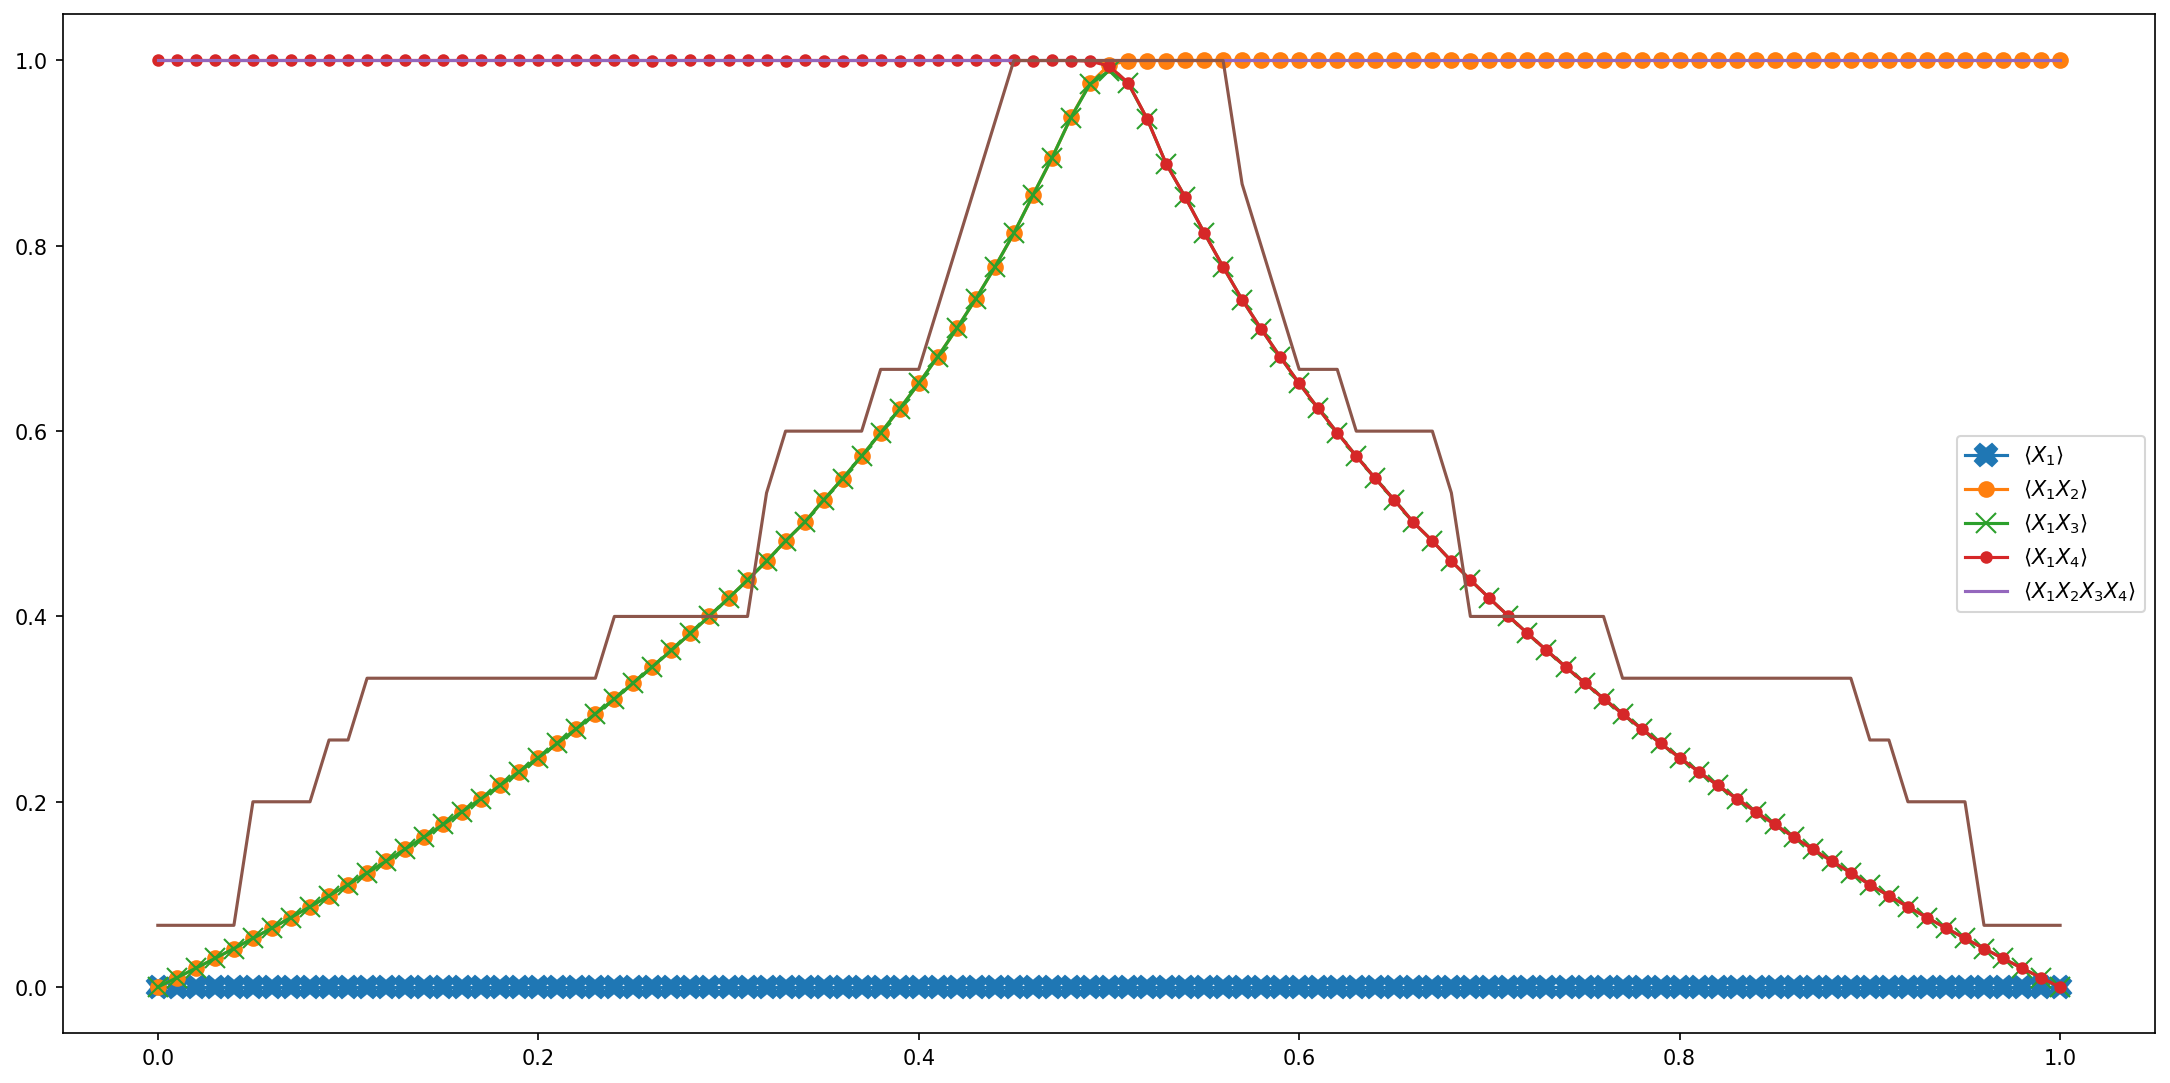

In [51]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

dephasing + deamp

In [13]:
lam1ss=[]
lam12ss=[]
lam13ss=[]
lam14ss=[]
lam1234ss=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0.,1.01,0.05)
for p1 in rng:   
    
    lam1s=[]
    lam12s=[]
    lam13s=[]
    lam14s=[]
    lam1234s=[]
    
    for p2 in rng:
    
        trans = funcs.single_trans_qc2(p1,p2,'x_flip','z_flip')
        MPO = iMPS.iMPO()
        MPO.construct_from_tensor_list([trans,trans])

        MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
        MPS_power2.update(100,1e-3)  
        
        dims.append(MPS_power2.MPS2.chi[0])
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
        lam12 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
        lam13 = strap.calculate_eig()
        
    
        strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
        lam14 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
        lam1234 = strap.calculate_eig()
        
        strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
        lam1 = strap.calculate_eig()
        
    
        lam12s.append(lam12)
        lam13s.append(lam13)
        lam14s.append(lam14)
        lam1234s.append(lam1234)
        lam1s.append(lam1)

    lam12ss.append(lam12s)
    lam13ss.append(lam13s)
    lam14ss.append(lam14s)
    lam1234ss.append(lam1234s)
    lam1ss.append(lam1s)
    print(p1)

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0


In [17]:
phase_diagram = [lam12ss,lam13ss,lam14ss]
#fname = './x_flip_z_flip.npy'
#np.save(fname,phase_diagram)

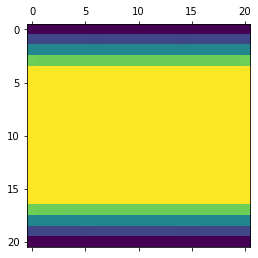

In [15]:
pyplot.matshow(np.abs(lam12ss))

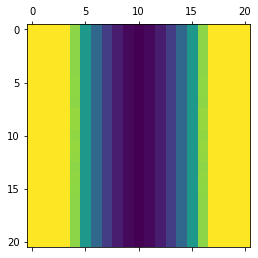

In [16]:
pyplot.matshow(np.abs(lam14ss))

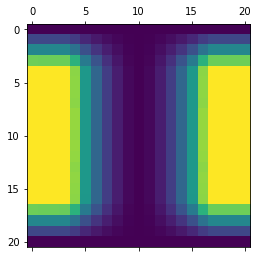

In [14]:
pyplot.matshow(np.abs(lam13ss))

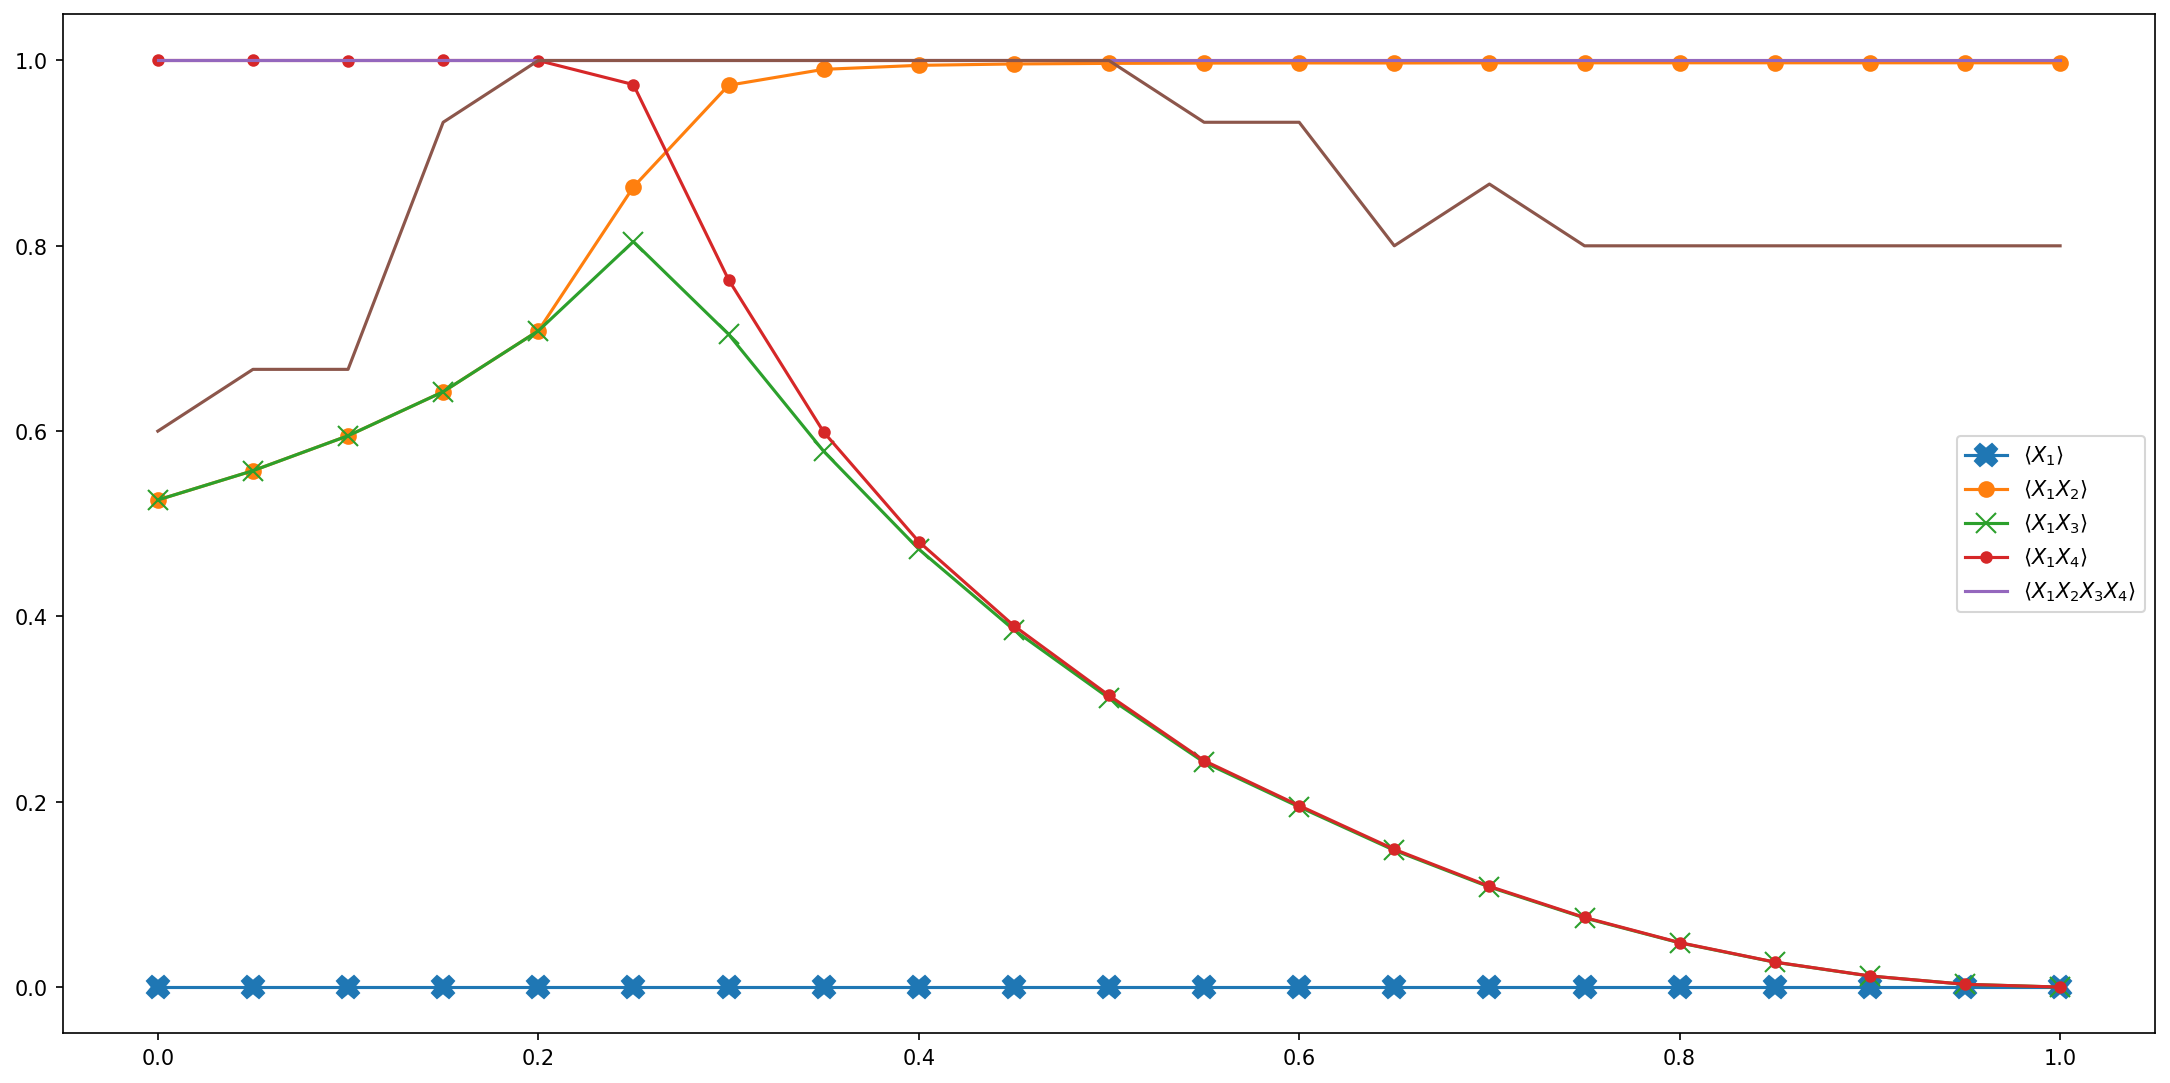

In [29]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(np.array(dims)/15)
pyplot.legend()
pyplot.show()

X flip

In [11]:
eigs=[]
lam1s=[]
lam12s=[]
lam13s=[]
lam14s=[]
lam1234s=[]
dims=[]

Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,16])
B[0,0] =(linalg.expm(0.1*np.kron(Z,Z))).reshape([16,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0,1.01,0.01)
for p in rng:   
    
 
    
    trans = funcs.single_trans_qc(p,'x_flip')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-5)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO13,MPS_power2.MPS2)
    lam13 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO14,MPS_power2.MPS2)
    lam14 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1234,MPS_power2.MPS2)
    lam1234 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    lam12s.append(lam12)
    lam13s.append(lam13)
    lam14s.append(lam14)
    lam1234s.append(lam1234)
    lam1s.append(lam1)


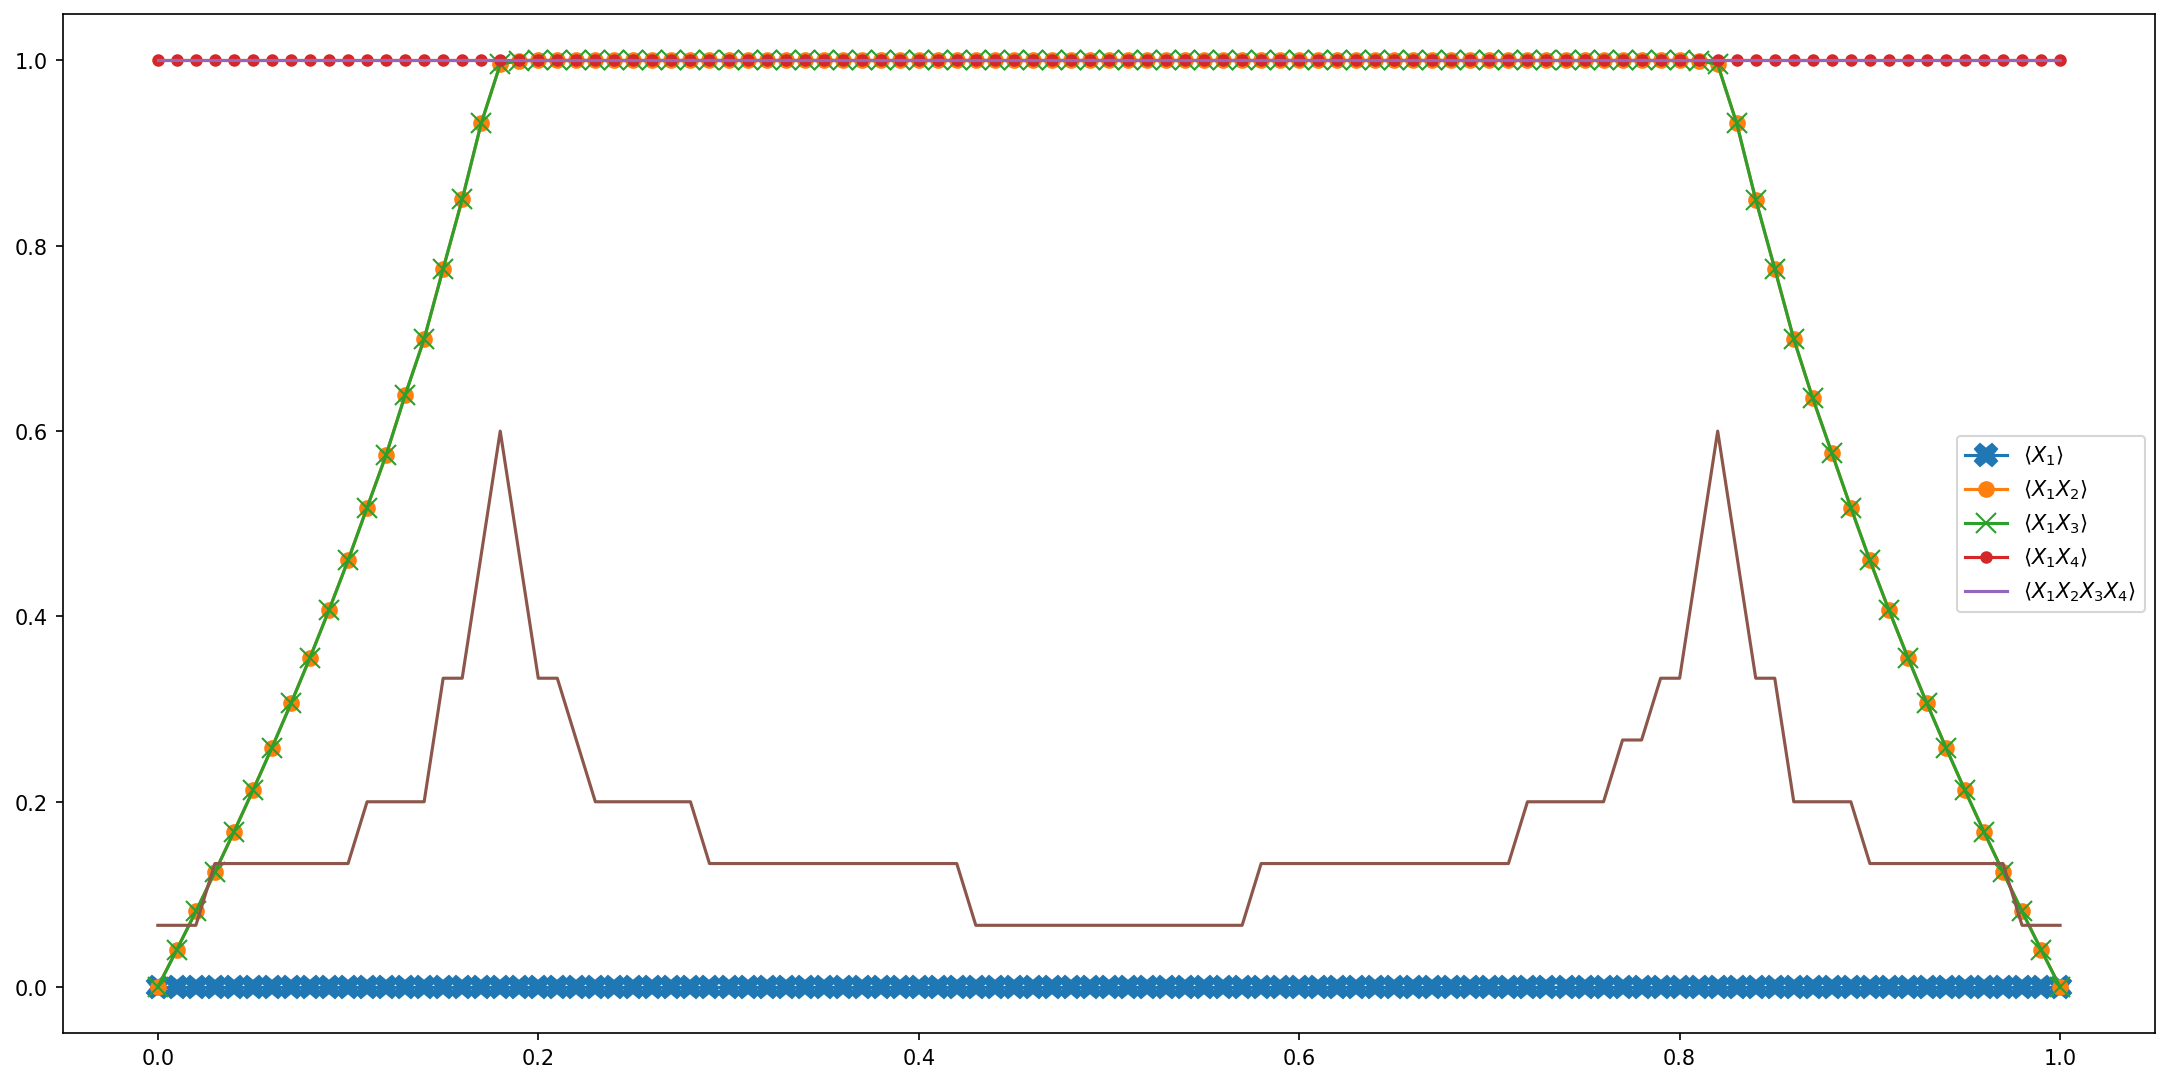

In [12]:
pyplot.figure(figsize=(18,9),dpi = 150)
pyplot.plot(rng,np.abs(lam1s),'X-',label = '$\langle X_1\\rangle$',markersize=11)
pyplot.plot(rng,np.abs(lam12s),'o-',label = '$\langle X_1X_2 \\rangle$',markersize=7)
pyplot.plot(rng,np.abs(lam13s),'x-',label = '$\langle X_1X_3\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam14s),'.-',label = '$\langle X_1X_4\\rangle$',markersize=10)
pyplot.plot(rng,np.abs(lam1234s),label = '$\langle X_1X_2X_3X_4\\rangle$')
pyplot.plot(rng,np.array(dims)/15)
pyplot.legend()
pyplot.show()

purification + overlap


In [2]:
X = np.array([[0,1],[1,0]])
Id = np.eye(2)

X1 = np.zeros([1,1,4,4])
X1[0,0,:,:] = np.kron(X,Id)

X2 = np.zeros([1,1,4,4])
X2[0,0,:,:] = np.kron(Id,X)

X12= np.zeros([1,1,4,4])
X12[0,0,:,:] = np.kron(X,X)



MPO12 = iMPS.iMPO()
MPO12.construct_from_tensor_list([X12,X12])

MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([X1,X1])

MPO2 = iMPS.iMPO()
MPO2.construct_from_tensor_list([X2,X2])

In [3]:
eigs=[]
lam1s=[]
lam12s=[]
lam2s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*X)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])

rng = np.arange(0,1.01,0.01)
for p in rng:   
    
 
    
    trans = funcs.single_trans_pur(p,'x_flip')
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=15)
    MPS_power2.update(100,1e-5)  
    
    dims.append(MPS_power2.MPS2.chi[0])
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO12,MPS_power2.MPS2)
    lam12 = strap.calculate_eig()
    
    strap = iMPS.strap(MPS_power2.MPS2,MPO1,MPS_power2.MPS2)
    lam1 = strap.calculate_eig()
    
   
    strap = iMPS.strap(MPS_power2.MPS2,MPO2,MPS_power2.MPS2)
    lam2 = strap.calculate_eig()
    
    
    
   
    lam12s.append(lam12)
    lam1s.append(lam1)
    lam2s.append(lam2)

AssertionError: nondegenerate state expected

In [7]:
print(p)

1.0


/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


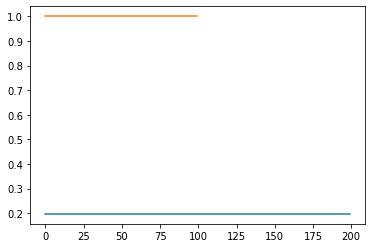

In [8]:
pyplot.plot(lam1s)
pyplot.plot(lam12s)

In [14]:
M = funcs.qc(0.5,'x_flip')
M1 = funcs.qc(0,'x_flip')
dM = np.tensordot(M,M1.conj(),([1,2],[1,2]))
dM

array([[0.70710678, 0.        ],
       [0.        , 0.70710678]])

array([[0.9486833, 0.       ],
       [0.       , 0.9486833]])